<a href="https://colab.research.google.com/github/Fatema2525/machine-learning-and-deep-learning-projects/blob/main/Music_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle -q

In [2]:
import os
import json
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [3]:
kaggle_config = json.load(open("kaggle.json"))

In [4]:
kaggle_config.keys()

dict_keys(['username', 'key'])

In [5]:
os.environ['KAGGLE_USERNAME'] = kaggle_config['username']
os.environ['KAGGLE_KEY'] = kaggle_config['key']

In [6]:
!kaggle datasets download notshrirang/spotify-million-song-dataset

Dataset URL: https://www.kaggle.com/datasets/notshrirang/spotify-million-song-dataset
License(s): CC0-1.0
  0% 0.00/20.7M [00:00<?, ?B/s]
100% 20.7M/20.7M [00:00<00:00, 1.41GB/s]


In [7]:
!ls

'archive (28).zip'   sample_data
 kaggle.json	     spotify-million-song-dataset.zip


In [8]:
with zipfile.ZipFile('/content/spotify-million-song-dataset.zip','r') as zip:
  zip.extractall()

In [9]:
df = pd.read_csv("/content/spotify_millsongdata.csv")

In [10]:
df.shape

(57650, 4)

In [11]:
df.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57650 entries, 0 to 57649
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  57650 non-null  object
 1   song    57650 non-null  object
 2   link    57650 non-null  object
 3   text    57650 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [13]:
df.isnull().sum()

,0
artist,0
song,0
link,0
text,0


In [14]:
df['artist'].value_counts().head(10)

,count
artist,
Donna Summer,191
Gordon Lightfoot,189
Bob Dylan,188
George Strait,188
Loretta Lynn,187
Alabama,187
Cher,187
Reba Mcentire,187
Chaka Khan,186


In [15]:
df = df.sample(10000)
df = df.drop('link',axis=1).reset_index(drop=True)

In [17]:
all_lyrics = " ".join(df['text'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_lyrics)

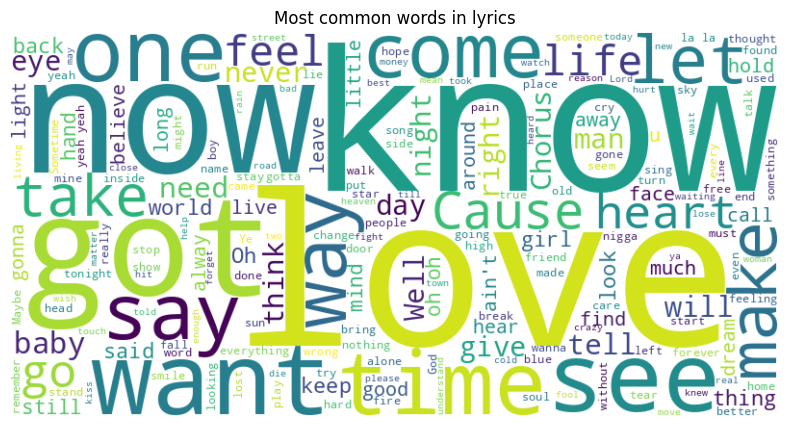

In [20]:
plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.title("Most common words in lyrics")
plt.show()

In [21]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [22]:
stop_words = set(stopwords.words('english'))

In [25]:
def preprocess_text(text):
  text = re.sub(r"[^a-zA-z]","",text)
  text = text.lower()
  tokens = word_tokenize(text)
  tokens = [word for word in tokens if word not in stop_words]
  return "".join(tokens)

In [26]:
df['cleaned_text'] = df['text'].apply(preprocess_text)

In [27]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_text'])

In [28]:
cosine_sim = cosine_similarity(tfidf_matrix,tfidf_matrix)

In [29]:
def recommended_songs(song_name,cosine_sim=cosine_sim, df=df,top_n=5):
  idx = df[df['song'].str.lower() == song_name.lower()].index
  if len(idx) == 0:
    return "Song not found in the dataset!"
  idx = idx[0]
  sim_scores = list(enumerate(cosine_sim[idx]))
  sim_scores = sorted(sim_scores,key=lambda x:x[1],reverse=True)
  sim_scores = (sim_scores[1:top_n+1])

  song_indices = [i[0] for i in sim_scores]
  return df[['artist','song']].iloc[song_indices]

In [30]:
df["song"][2]

'Sound Asleep'

In [32]:
print("/nRecommendations:")
print(recommended_songs("Sound Asleep"))

/nRecommendations:
             artist                    song
1  System Of A Down                 Spiders
2           Squeeze            Sound Asleep
3   Beautiful South  Tonight I Fancy Myself
4    Our Lady Peace      Walking In Circles
5       Ray Charles   I've Got News For You
